In [1]:
# Importing necessary libaries 
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from kneed import KneeLocator 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

pd.set_option('display.max_columns', None)

In [2]:
# Importing data and doing brief analysis
file_dir = 'C:/Users/jvasq/PythonProjects/Reds Take Home Assignment/dew-point-pitching/'
df = pd.read_csv(f'{file_dir}data.csv')

In [3]:
df.shape

(9889, 26)

In [4]:
df.sample(10)

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,OUT_KEY,BALLS,STRIKES,IS_RUNNER_ON_1B,IS_RUNNER_ON_2B,IS_RUNNER_ON_3B,PITCHER_KEY,THROW_SIDE_KEY,PITCH_TYPE_TRACKED_KEY,EVENT_RESULT_KEY,PITCH_RESULT_KEY,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
5636,19830,1,7,1,2,0,0,0,0,0,596133,R,CB,NaN,StrikeCalled,-8.83155,7.423560,2231.510010,81.001701,-0.836815,5.81092,5.60,0.818886,-8.87310,-0.717713,1.91952
7181,22542,2,1,1,0,0,0,0,0,0,671096,L,CB,NaN,BallCalled,-2.38041,-6.617640,2657.320068,80.097298,1.604980,6.03390,6.53,-2.580330,-9.15537,-0.188763,1.38156
3379,9129,1,1,5,0,2,2,0,0,0,596133,R,CF,NaN,BallCalled,5.63897,3.239930,2290.699951,87.698997,-0.769775,5.81428,5.65,1.710840,-5.54142,0.543149,3.33772
3619,8228,7,4,1,2,0,0,1,0,0,668881,R,SL,NaN,FoulBall,3.82225,2.600540,2333.040039,88.692200,-2.732590,5.77469,6.18,2.844370,-6.61908,-0.330905,2.35561
8634,12995,4,7,2,2,1,0,1,1,0,682227,L,CF,NaN,StrikeCalled,10.34400,-1.392700,2381.500000,89.389297,0.973363,6.40470,5.83,-0.704291,-5.75114,0.440099,3.19427
2271,4415,5,5,5,1,2,2,0,1,1,668933,R,CF,NaN,BallCalled,7.26519,-0.836475,2344.510010,96.151398,-1.810060,6.02995,5.71,3.603190,-7.10271,1.627850,1.38850
2008,121,8,1,4,0,2,1,0,0,0,608371,R,SW,field_out,InPlay,3.44435,23.180700,3063.129883,82.137001,-1.935730,5.65103,5.40,4.963300,-7.25400,0.683596,2.25745
1796,5259,5,1,3,0,2,0,0,0,0,608371,R,FB,NaN,BallCalled,19.88110,-0.992325,2469.350098,93.785202,-1.967540,5.68332,5.63,1.554370,-2.67010,-0.428675,4.26345
4163,6833,4,6,4,2,1,2,0,1,1,682227,L,SW,strikeout,FoulBall,-3.19589,-15.101200,2381.649902,82.244797,0.582623,6.48102,6.03,-2.708900,-8.86766,-0.613124,2.01275
3047,5868,7,2,2,0,1,0,1,0,0,664139,R,CF,field_out,InPlay,11.45520,1.707570,2401.100098,90.721298,-1.284120,5.79141,6.80,1.776210,-5.03720,0.190240,2.99886


In [5]:
df.isna().sum()

PID                             0
INNING_KEY                      0
BATTER_IN_INNING_KEY            0
PITCH_NUMBER                    0
OUT_KEY                         0
BALLS                           0
STRIKES                         0
IS_RUNNER_ON_1B                 0
IS_RUNNER_ON_2B                 0
IS_RUNNER_ON_3B                 0
PITCHER_KEY                     0
THROW_SIDE_KEY                  0
PITCH_TYPE_TRACKED_KEY          0
EVENT_RESULT_KEY             7258
PITCH_RESULT_KEY                0
INDUCED_VERTICAL_BREAK          0
HORIZONTAL_BREAK                0
SPIN_RATE_ABSOLUTE              0
RELEASE_SPEED                   0
RELEASE_SIDE                    0
RELEASE_HEIGHT                  0
RELEASE_EXTENSION               0
HORIZONTAL_APPROACH_ANGLE       0
VERTICAL_APPROACH_ANGLE         0
PLATE_X                         0
PLATE_Z                         0
dtype: int64

In [6]:
df.describe()

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,OUT_KEY,BALLS,STRIKES,IS_RUNNER_ON_1B,IS_RUNNER_ON_2B,IS_RUNNER_ON_3B,PITCHER_KEY,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
count,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000
mean,12609.406007,5.007786,2.935079,2.878653,0.997674,0.882293,0.874810,0.309839,0.174638,0.102033,637412.410254,6.937282,-0.370263,2293.930972,89.144199,-0.668325,5.825911,6.226203,0.768435,-6.415098,0.072584,2.338810
std,7802.242707,2.660815,1.741784,1.714279,0.822356,0.965159,0.822483,0.462451,0.379677,0.302706,44958.635446,7.749274,11.163954,377.813504,5.925928,1.758907,0.460130,0.561980,2.270130,1.831539,0.822927,0.975443
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,518585.000000,-21.982201,-25.363899,524.210999,54.441101,-3.305770,4.330060,3.790000,-8.813830,-13.842500,-3.588650,-1.892670
25%,6004.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,596133.000000,1.593640,-9.955600,2131.350098,84.752502,-1.805150,5.659290,5.780000,-0.463435,-7.700000,-0.479877,1.689210
50%,12590.000000,5.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,664747.000000,7.065330,-0.769889,2322.459961,90.093803,-1.316150,5.835330,6.160000,0.898488,-6.365400,0.073093,2.340190
75%,19511.000000,7.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,668933.000000,13.751000,8.787780,2502.469971,93.820900,0.550795,6.109050,6.630000,2.298520,-5.029050,0.621404,3.001330
max,28755.000000,11.000000,14.000000,14.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,691094.000000,22.767300,26.991199,3314.679932,102.327003,4.026390,7.090960,8.040000,7.158210,-1.185400,3.983160,6.079330


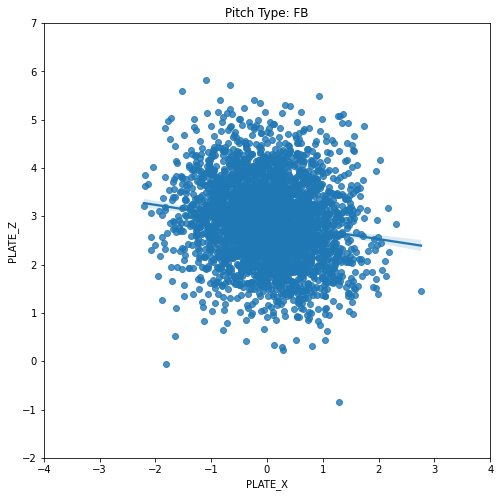

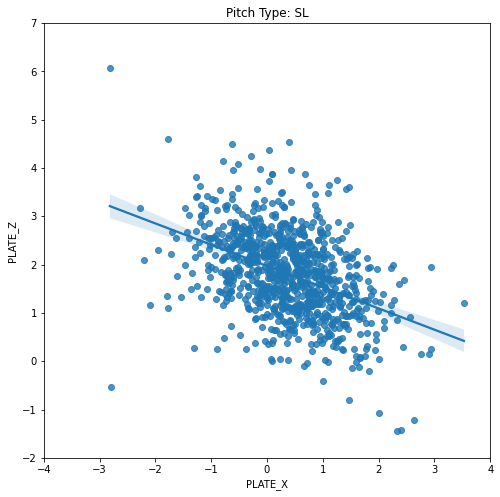

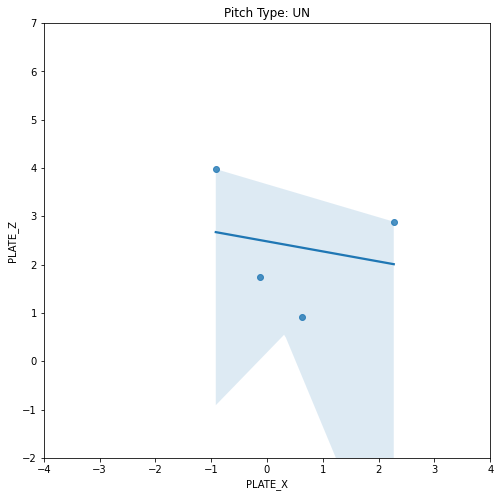

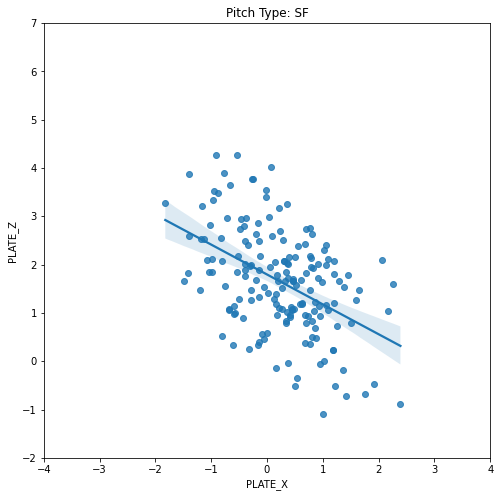

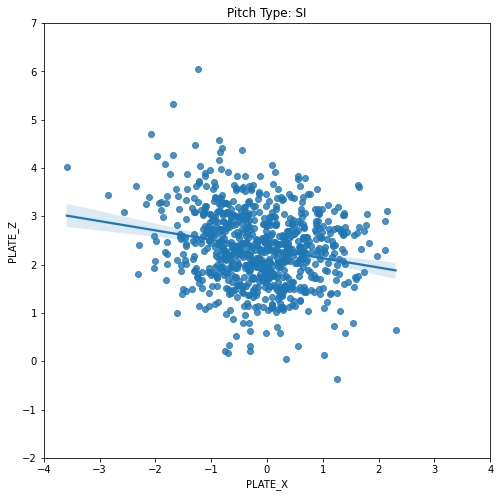

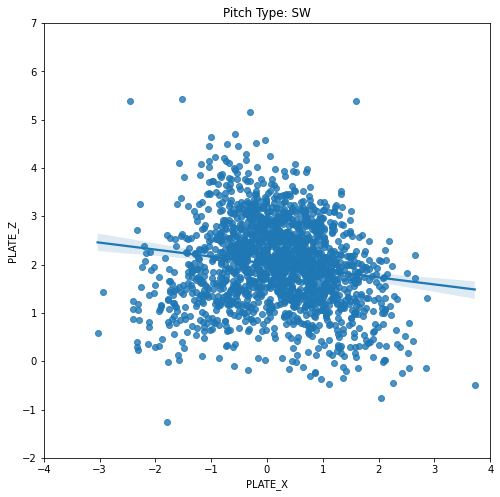

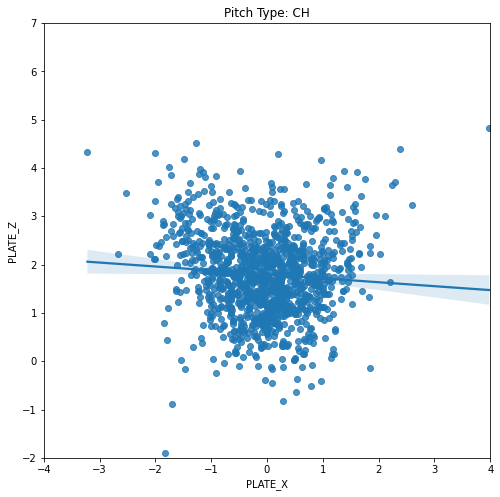

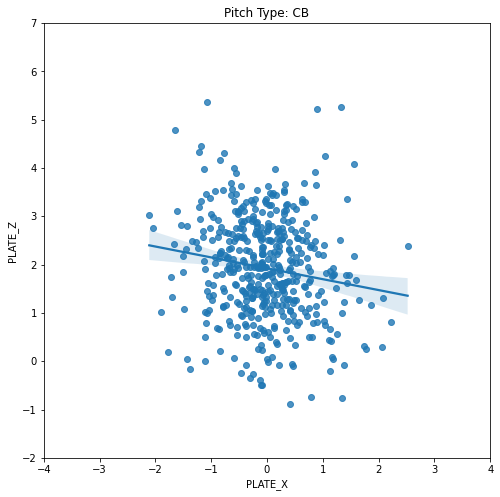

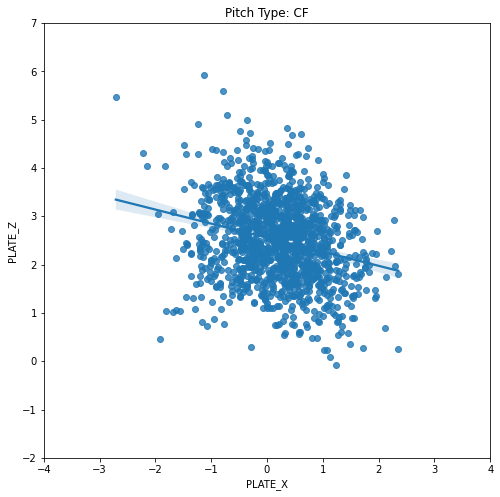

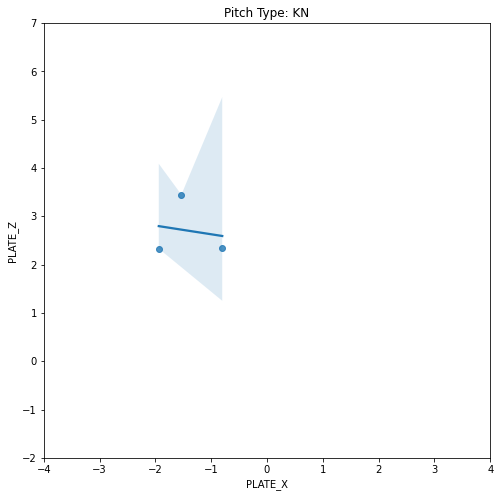

In [7]:
# Visualizing where each pitch type crossed home plate
# Set the plots to the min/max PLATE_X/Z values
for pitch in df['PITCH_TYPE_TRACKED_KEY'].unique():
    fig, ax = plt.subplots(figsize=(8,8))
    sns.regplot(ax=ax, data=df.loc[df['PITCH_TYPE_TRACKED_KEY'] == pitch], x='PLATE_X', y='PLATE_Z')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-2, 7)
    plt.title(f'Pitch Type: {pitch}')
    plt.show()

In [8]:
df.columns.values

array(['PID', 'INNING_KEY', 'BATTER_IN_INNING_KEY', 'PITCH_NUMBER',
       'OUT_KEY', 'BALLS', 'STRIKES', 'IS_RUNNER_ON_1B',
       'IS_RUNNER_ON_2B', 'IS_RUNNER_ON_3B', 'PITCHER_KEY',
       'THROW_SIDE_KEY', 'PITCH_TYPE_TRACKED_KEY', 'EVENT_RESULT_KEY',
       'PITCH_RESULT_KEY', 'INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK',
       'SPIN_RATE_ABSOLUTE', 'RELEASE_SPEED', 'RELEASE_SIDE',
       'RELEASE_HEIGHT', 'RELEASE_EXTENSION', 'HORIZONTAL_APPROACH_ANGLE',
       'VERTICAL_APPROACH_ANGLE', 'PLATE_X', 'PLATE_Z'], dtype=object)

In [9]:
# Specifying the numerical and categorical columns to be used
num_cols = ['INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK', 'SPIN_RATE_ABSOLUTE', 'RELEASE_SPEED', 
            'RELEASE_SIDE', 'RELEASE_HEIGHT', 'RELEASE_EXTENSION', 'HORIZONTAL_APPROACH_ANGLE', 
            'VERTICAL_APPROACH_ANGLE', 'PLATE_X', 'PLATE_Z']
cat_cols = ['INNING_KEY', 'PITCHER_KEY', 'THROW_SIDE_KEY']#, 'PITCH_TYPE_TRACKED_KEY']
pitch_type = ['PITCH_TYPE_TRACKED_KEY']

# Creating dummies for categorical features
# Dropping first dummy column for categories to avoid adding more noise
# But keeping all dummy columns for pitch type to cluster by pitch type
df = df.loc[:, ['PID']+num_cols+cat_cols+pitch_type]
df = pd.get_dummies(df, prefix=None, columns=cat_cols, drop_first=True)
df = pd.get_dummies(df, prefix=None, columns=pitch_type, drop_first=False)

In [10]:
df.columns

Index(['PID', 'INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK',
       'SPIN_RATE_ABSOLUTE', 'RELEASE_SPEED', 'RELEASE_SIDE', 'RELEASE_HEIGHT',
       'RELEASE_EXTENSION', 'HORIZONTAL_APPROACH_ANGLE',
       'VERTICAL_APPROACH_ANGLE', 'PLATE_X', 'PLATE_Z', 'INNING_KEY_2',
       'INNING_KEY_3', 'INNING_KEY_4', 'INNING_KEY_5', 'INNING_KEY_6',
       'INNING_KEY_7', 'INNING_KEY_8', 'INNING_KEY_9', 'INNING_KEY_10',
       'INNING_KEY_11', 'PITCHER_KEY_570666', 'PITCHER_KEY_571656',
       'PITCHER_KEY_571882', 'PITCHER_KEY_571912', 'PITCHER_KEY_592527',
       'PITCHER_KEY_592741', 'PITCHER_KEY_594580', 'PITCHER_KEY_594902',
       'PITCHER_KEY_596133', 'PITCHER_KEY_608371', 'PITCHER_KEY_611093',
       'PITCHER_KEY_613564', 'PITCHER_KEY_621219', 'PITCHER_KEY_622065',
       'PITCHER_KEY_622088', 'PITCHER_KEY_641427', 'PITCHER_KEY_643361',
       'PITCHER_KEY_650960', 'PITCHER_KEY_656818', 'PITCHER_KEY_664028',
       'PITCHER_KEY_664139', 'PITCHER_KEY_664747', 'PITCHER_KEY_665665',
       'P

In [11]:
# Specify encoded cat_cols and pitch_types
cat_cols = ['INNING_KEY_2', 'INNING_KEY_3', 'INNING_KEY_4', 'INNING_KEY_5', 'INNING_KEY_6', 'INNING_KEY_7', 'INNING_KEY_8', 
            'INNING_KEY_9', 'INNING_KEY_10', 'INNING_KEY_11', 'PITCHER_KEY_570666', 'PITCHER_KEY_571656', 
            'PITCHER_KEY_571882', 'PITCHER_KEY_571912', 'PITCHER_KEY_592527', 'PITCHER_KEY_592741', 'PITCHER_KEY_594580', 
            'PITCHER_KEY_594902', 'PITCHER_KEY_596133', 'PITCHER_KEY_608371', 'PITCHER_KEY_611093', 'PITCHER_KEY_613564', 
            'PITCHER_KEY_621219', 'PITCHER_KEY_622065', 'PITCHER_KEY_622088', 'PITCHER_KEY_641427', 'PITCHER_KEY_643361', 
            'PITCHER_KEY_650960', 'PITCHER_KEY_656818', 'PITCHER_KEY_664028', 'PITCHER_KEY_664139', 'PITCHER_KEY_664747', 
            'PITCHER_KEY_665665', 'PITCHER_KEY_666157', 'PITCHER_KEY_668881', 'PITCHER_KEY_668933', 'PITCHER_KEY_668984', 
            'PITCHER_KEY_669270', 'PITCHER_KEY_671096', 'PITCHER_KEY_674285', 'PITCHER_KEY_680689', 'PITCHER_KEY_682227', 
            'PITCHER_KEY_683175', 'PITCHER_KEY_686651', 'PITCHER_KEY_686730', 'PITCHER_KEY_691094', 'THROW_SIDE_KEY_R']

pitch_types = ['PITCH_TYPE_TRACKED_KEY_CB', 'PITCH_TYPE_TRACKED_KEY_CF', 'PITCH_TYPE_TRACKED_KEY_CH', 
               'PITCH_TYPE_TRACKED_KEY_FB', 'PITCH_TYPE_TRACKED_KEY_KN', 'PITCH_TYPE_TRACKED_KEY_SF', 
               'PITCH_TYPE_TRACKED_KEY_SI', 'PITCH_TYPE_TRACKED_KEY_SL', 'PITCH_TYPE_TRACKED_KEY_SW', 
               'PITCH_TYPE_TRACKED_KEY_UN']

1.12


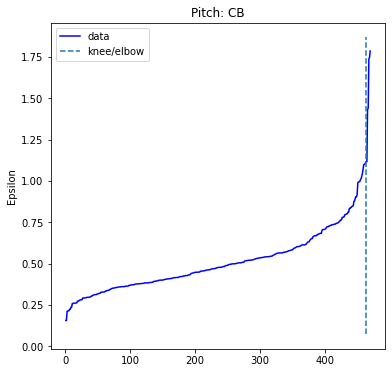

0.93


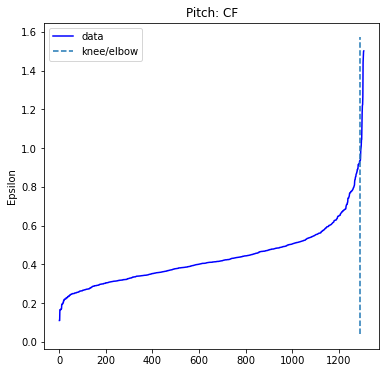

1.49


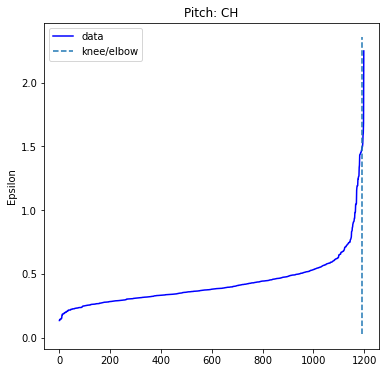

1.02


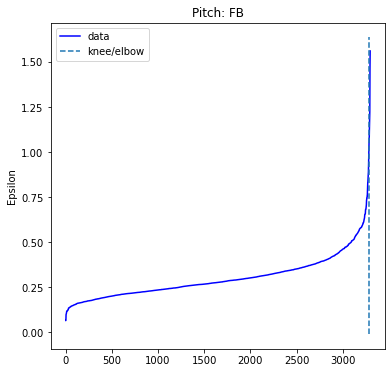

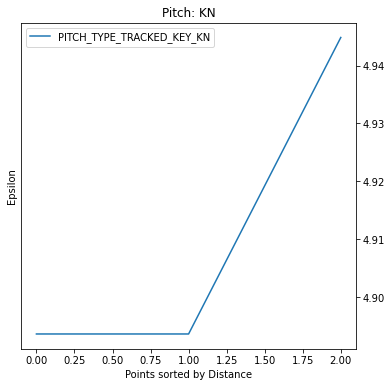

1.26


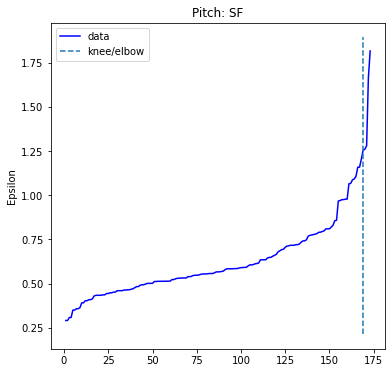

1.46


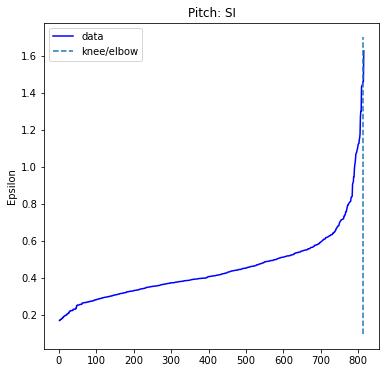

1.52


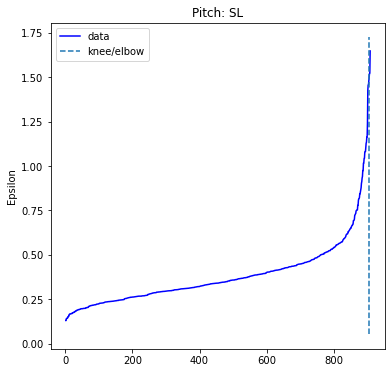

0.9


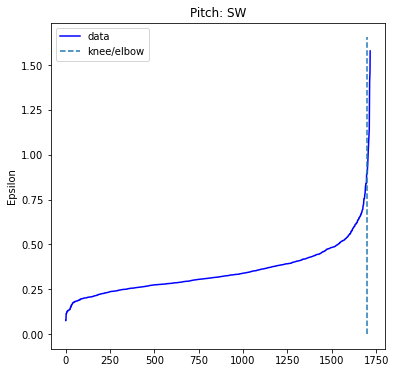

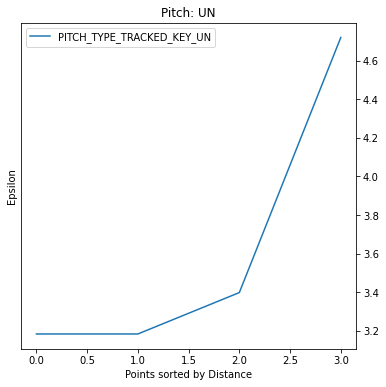

In [12]:
# Scaling the numerical values for each pitch type
scaled_df = df.loc[:, ['PID']+cat_cols+num_cols+pitch_types]
for pitch in pitch_types:
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaled_df.loc[scaled_df[pitch]==1, num_cols] = scaler.fit_transform(scaled_df.loc[scaled_df[pitch]==1, num_cols])

# Using KneeLocator to find an optimal epsilon value, and a K-Distance plot for the pitch types with fewer than 10 points 
legends = []
for pitch in pitch_types:
    nn = NearestNeighbors(n_neighbors=2)
    nbors = nn.fit(scaled_df.loc[scaled_df[pitch]==1, num_cols+cat_cols])
    distances, indices = nbors.kneighbors(scaled_df.loc[scaled_df[pitch]==1, num_cols+cat_cols])
    
    distances = np.sort(distances, axis=0)
    distances = distances[:, 1]
    
    _pitch = pitch.split('_')[4]
    if scaled_df.loc[scaled_df[pitch]==1, pitch].sum() > 5:
        elbow = KneeLocator(range(1,len(distances)+1), distances, S=0, curve='concave', direction='increasing', online=True) 
        print(round(distances[elbow.elbow], 2))
        elbow.plot_knee()
        plt.title(f'Pitch: {_pitch}')
        plt.ylabel('Epsilon')
        plt.show()
    else:
        fig, ax = plt.subplots(figsize=(6,6))
        ax.yaxis.tick_right()
        sns.lineplot(ax=ax, data=distances, label=pitch)
        plt.xlabel('Points sorted by Distance')
        plt.ylabel('Epsilon')
        plt.title(f'Pitch: {_pitch}')
        plt.show()

In [13]:
# KneeLocator-produced epsilon values 
cb_eps = 1.12 
cf_eps = 0.93
ch_eps = 1.49
fb_eps = 1.02
kn_eps = 4.89
sf_eps = 1.25
si_eps = 1.3
sl_eps = 1.46
sw_eps = 0.9
un_eps = 3.4

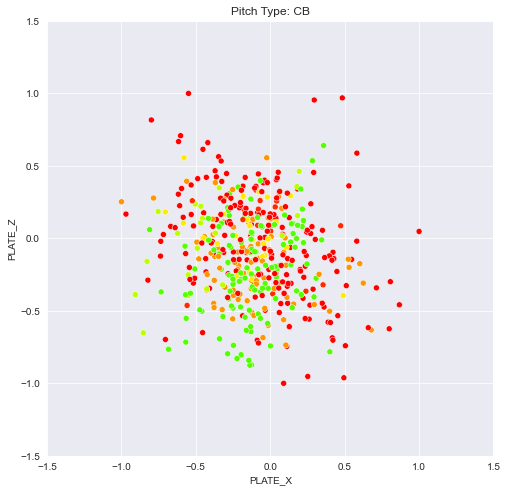

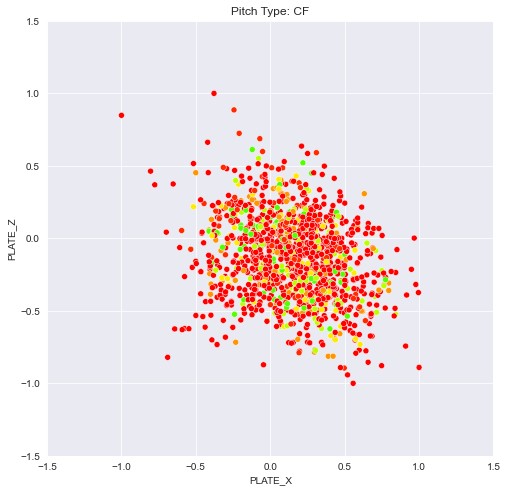

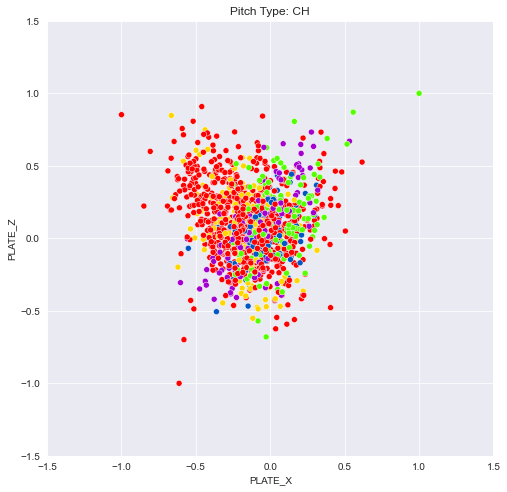

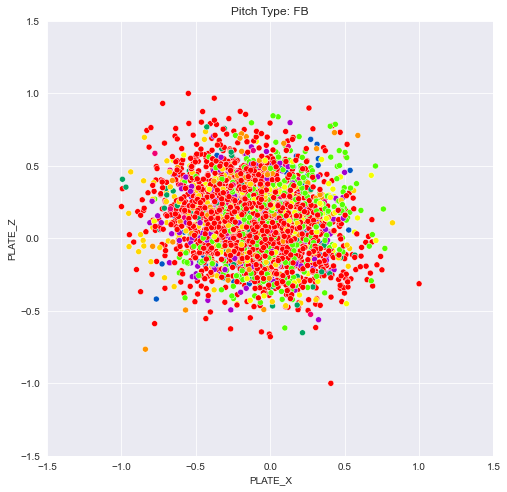

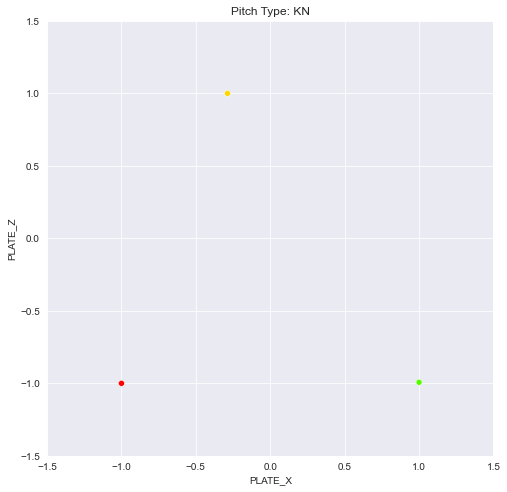

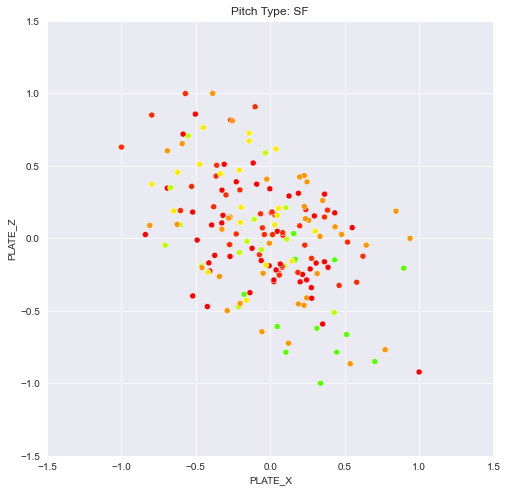

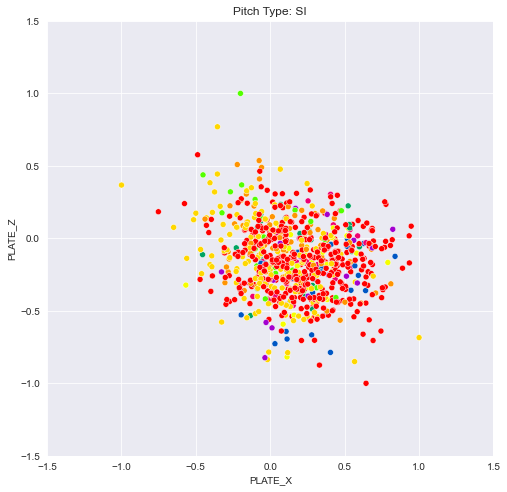

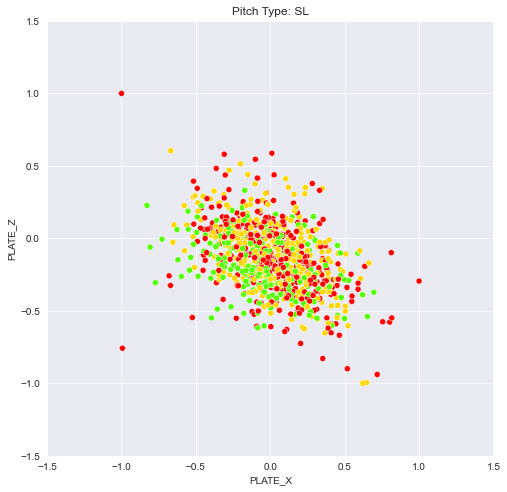

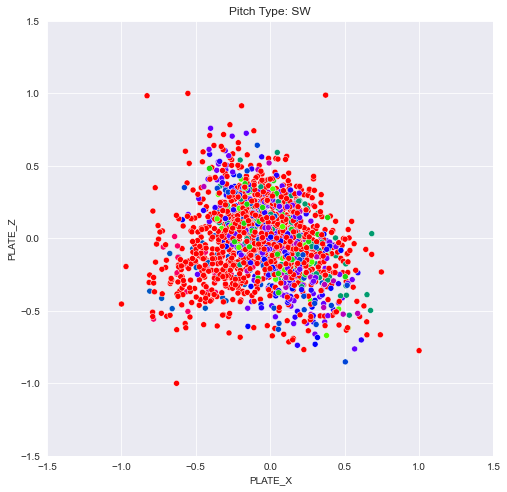

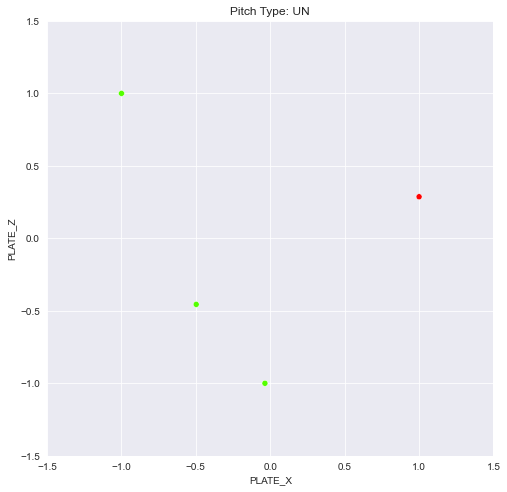

In [14]:
# Assigning epsilon and min_samples values for each pitch type
for pitch in pitch_types:
    _pitch = pitch.split('_')[4]
    total = scaled_df[pitch].sum()

    if _pitch == 'CB':
        eps = cb_eps
        min_samples = round(total*0.03)
    elif _pitch == 'CF':
        eps = cf_eps
        min_samples = round(total*0.04)
    elif _pitch == 'CH':
        eps = ch_eps
        min_samples = round(total*0.05)
    elif _pitch == 'FB':
        eps = fb_eps
        min_samples = round(total*0.015)
    elif _pitch == 'KN':
        eps = kn_eps
        min_samples = 1
    elif _pitch == 'SF':
        eps = sf_eps
        min_samples = round(total*0.08)
    elif _pitch == 'SI':
        eps = si_eps
        min_samples = round(total*0.025)
    elif _pitch == 'SL':
        eps = sl_eps
        min_samples = round(total*0.08)
    elif _pitch == 'SW':
        eps = sw_eps
        min_samples = round(total*0.022)
    elif _pitch == 'UN':
        eps = un_eps
        min_samples = 2
    
# Plotting the clusters against the X/Z values provided
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(scaled_df.loc[scaled_df[pitch]==1, num_cols+cat_cols])

    scaled_df.loc[scaled_df[pitch]==1, 'clusters'] = db.labels_
    
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize=(8,8))
    sns.scatterplot(ax=ax, data=scaled_df.loc[scaled_df[pitch] == 1], x='PLATE_X', y='PLATE_Z', c=scaled_df.loc[scaled_df[pitch] == 1, 'clusters'], cmap='prism')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    plt.title(f"Pitch Type: {pitch.split('_')[4]}")
    plt.show()

In [15]:
# Calculating the probabilities for each pitch type and mapping based on cluster value
scaled_df['DEWPOINT_AFFECTED'] = scaled_df['clusters']

for pitch in pitch_types:
    n_clusters = sorted(scaled_df.loc[scaled_df[pitch]==1, 'clusters'].unique())
    prob = (1/(len(n_clusters)-1))
    probs = {}
    for i in range(int(n_clusters[0]), int(n_clusters[-1])+1):
        if int(n_clusters[0]) == -1:
            probs[i] = round(1 - (prob*(i+1)), 2)
        elif int(n_clusters[0]) == 0:
            probs[i] = round(1 - (prob*(i)), 2)
    
    print(probs)
    print(pitch, n_clusters)
    print('')
    scaled_df.loc[scaled_df[pitch]==1, 'DEWPOINT_AFFECTED'] = scaled_df.loc[scaled_df[pitch]==1, 'DEWPOINT_AFFECTED'].map(probs)

{-1: 1.0, 0: 0.8, 1: 0.6, 2: 0.4, 3: 0.2, 4: 0.0}
PITCH_TYPE_TRACKED_KEY_CB [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]

{-1: 1.0, 0: 0.8, 1: 0.6, 2: 0.4, 3: 0.2, 4: 0.0}
PITCH_TYPE_TRACKED_KEY_CF [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]

{-1: 1.0, 0: 0.75, 1: 0.5, 2: 0.25, 3: 0.0}
PITCH_TYPE_TRACKED_KEY_CH [-1.0, 0.0, 1.0, 2.0, 3.0]

{-1: 1.0, 0: 0.88, 1: 0.75, 2: 0.62, 3: 0.5, 4: 0.38, 5: 0.25, 6: 0.12, 7: 0.0}
PITCH_TYPE_TRACKED_KEY_FB [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

{0: 1.0, 1: 0.5, 2: 0.0}
PITCH_TYPE_TRACKED_KEY_KN [0.0, 1.0, 2.0]

{-1: 1.0, 0: 0.8, 1: 0.6, 2: 0.4, 3: 0.2, 4: 0.0}
PITCH_TYPE_TRACKED_KEY_SF [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]

{-1: 1.0, 0: 0.88, 1: 0.75, 2: 0.62, 3: 0.5, 4: 0.38, 5: 0.25, 6: 0.12, 7: 0.0}
PITCH_TYPE_TRACKED_KEY_SI [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

{-1: 1.0, 0: 0.5, 1: 0.0}
PITCH_TYPE_TRACKED_KEY_SL [-1.0, 0.0, 1.0]

{-1: 1.0, 0: 0.91, 1: 0.82, 2: 0.73, 3: 0.64, 4: 0.55, 5: 0.45, 6: 0.36, 7: 0.27, 8: 0.18, 9: 0.09, 10: 0.0}
PITCH_TYPE_TRACKED_K

In [16]:
scaled_df.sample(10)

,PID,INNING_KEY_2,INNING_KEY_3,INNING_KEY_4,INNING_KEY_5,INNING_KEY_6,INNING_KEY_7,INNING_KEY_8,INNING_KEY_9,INNING_KEY_10,INNING_KEY_11,PITCHER_KEY_570666,PITCHER_KEY_571656,PITCHER_KEY_571882,PITCHER_KEY_571912,PITCHER_KEY_592527,PITCHER_KEY_592741,PITCHER_KEY_594580,PITCHER_KEY_594902,PITCHER_KEY_596133,PITCHER_KEY_608371,PITCHER_KEY_611093,PITCHER_KEY_613564,PITCHER_KEY_621219,PITCHER_KEY_622065,PITCHER_KEY_622088,PITCHER_KEY_641427,PITCHER_KEY_643361,PITCHER_KEY_650960,PITCHER_KEY_656818,PITCHER_KEY_664028,PITCHER_KEY_664139,PITCHER_KEY_664747,PITCHER_KEY_665665,PITCHER_KEY_666157,PITCHER_KEY_668881,PITCHER_KEY_668933,PITCHER_KEY_668984,PITCHER_KEY_669270,PITCHER_KEY_671096,PITCHER_KEY_674285,PITCHER_KEY_680689,PITCHER_KEY_682227,PITCHER_KEY_683175,PITCHER_KEY_686651,PITCHER_KEY_686730,PITCHER_KEY_691094,THROW_SIDE_KEY_R,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z,PITCH_TYPE_TRACKED_KEY_CB,PITCH_TYPE_TRACKED_KEY_CF,PITCH_TYPE_TRACKED_KEY_CH,PITCH_TYPE_TRACKED_KEY_FB,PITCH_TYPE_TRACKED_KEY_KN,PITCH_TYPE_TRACKED_KEY_SF,PITCH_TYPE_TRACKED_KEY_SI,PITCH_TYPE_TRACKED_KEY_SL,PITCH_TYPE_TRACKED_KEY_SW,PITCH_TYPE_TRACKED_KEY_UN,clusters,DEWPOINT_AFFECTED
9766,28626,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.159601,-0.519591,0.021640,0.730192,-0.829692,0.015553,-0.129412,0.534279,0.423936,0.091917,0.103704,0,0,0,1,0,0,0,0,0,0,-1.0,1.00
8497,28102,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.540758,0.314374,-0.015898,0.544183,0.319940,0.010031,0.463529,-0.296133,0.395247,-0.184088,0.029149,0,0,0,1,0,0,0,0,0,0,7.0,0.00
3582,8519,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.070771,0.056740,-0.047207,0.577575,-0.781382,0.355018,-0.365672,0.286011,0.248815,-0.382644,0.039634,0,0,0,0,0,0,0,1,0,0,0.0,0.50
3437,9415,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.258015,-0.241704,0.084980,0.671076,-0.366567,0.045347,-0.072941,0.134733,0.426095,-0.088106,0.120132,0,0,0,1,0,0,0,0,0,0,-1.0,1.00
4130,6440,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.336984,0.500758,-0.321729,-0.147190,-0.003827,0.898212,0.151724,0.393793,0.054872,0.036091,0.192915,0,0,1,0,0,0,0,0,0,0,2.0,0.25
8525,28105,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.366799,-0.473841,0.075165,0.630960,-0.488008,0.335644,0.303529,0.587172,0.251511,0.613800,-0.062155,0,0,0,1,0,0,0,0,0,0,-1.0,1.00
9208,20237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.279660,-0.717130,0.216159,0.117138,-0.588257,-0.608854,0.492958,0.349221,-0.201989,0.459847,-0.234574,0,0,0,0,0,0,1,0,0,0,-1.0,1.00
6659,17108,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.261767,0.476441,0.580454,0.461593,-0.480816,0.624335,0.090323,0.487375,-0.072886,-0.012659,-0.043678,0,0,0,0,0,0,0,0,1,0,-1.0,1.00
2251,4247,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.321296,-0.408160,0.147380,0.664030,-0.545328,0.496047,-0.680000,0.164797,-0.090664,-0.086924,-0.165603,0,1,0,0,0,0,0,0,0,0,4.0,0.00
7958,22360,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.043420,-0.637756,0.303652,0.390796,0.919599,-0.069350,0.045268,-0.553853,-0.080346,0.208295,-0.387801,1,0,0,0,0,0,0,0,0,0,4.0,0.00


In [17]:
# Producing the submission csv file
scaled_df[['PID','DEWPOINT_AFFECTED']].to_csv('submission.csv', index=False)